#**Maestría en Inteligencia Artificial Aplicada**

##**TC5044.10 Operaciones de aprendizaje automático**

###Tecnológico de Monterrey

###Dr. Gerardo Rodríguez Hernández

## **Fase 1_Equipo23**

## **Equipo # 23**

## **Nombre y matrícula:**

* Hansel Zapiain Rodriguez A00469031
* Víctor Daniel Bohórquez Toribio A01794554
* Ruben Guerrero del Fierro A01793005
* Omar Mexia Barraza A01794780
* Luis Axel González Hernández A01795321

# **Análisis Exploratorio de Datos**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from scipy.stats import boxcox

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
original = pd.read_csv("../data/raw/data.csv", sep=';')

In [6]:
X = original.drop(['Target'], axis=1)
y = original['Target']
Xtraining, Xtesting, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify=y)
df = Xtraining
print("La dimension del conjunto de entrenamiento es: ",Xtraining.shape)
print("La dimension del conjunto de prueba es: ",Xtesting.shape)

La dimension del conjunto de entrenamiento es:  (3096, 36)
La dimension del conjunto de prueba es:  (1328, 36)


In [7]:
# Tipos de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3096 entries, 4189 to 2675
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3096 non-null   int64  
 1   Application mode                                3096 non-null   int64  
 2   Application order                               3096 non-null   int64  
 3   Course                                          3096 non-null   int64  
 4   Daytime/evening attendance	                     3096 non-null   int64  
 5   Previous qualification                          3096 non-null   int64  
 6   Previous qualification (grade)                  3096 non-null   float64
 7   Nacionality                                     3096 non-null   int64  
 8   Mother's qualification                          3096 non-null   int64  
 9   Father's qualification                     

In [8]:
percentage_lost = (df.isnull().sum() / len(df)) * 100
percentage_lost

Marital status                                    0.0
Application mode                                  0.0
Application order                                 0.0
Course                                            0.0
Daytime/evening attendance\t                      0.0
Previous qualification                            0.0
Previous qualification (grade)                    0.0
Nacionality                                       0.0
Mother's qualification                            0.0
Father's qualification                            0.0
Mother's occupation                               0.0
Father's occupation                               0.0
Admission grade                                   0.0
Displaced                                         0.0
Educational special needs                         0.0
Debtor                                            0.0
Tuition fees up to date                           0.0
Gender                                            0.0
Scholarship holder          

In [9]:
# Análisis de Distribución
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Marital status,3096.0,1.182817,0.628490,1.00,1.0,1.000000,1.000000,6.000000
Application mode,3096.0,18.749354,17.467140,1.00,1.0,17.000000,39.000000,57.000000
Application order,3096.0,1.728359,1.311383,0.00,1.0,1.000000,2.000000,9.000000
Course,3096.0,8894.012274,1972.194960,33.00,9085.0,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,3096.0,0.891796,0.310688,0.00,1.0,1.000000,1.000000,1.000000
Previous qualification,3096.0,4.604974,10.323490,1.00,1.0,1.000000,1.000000,43.000000
Previous qualification (grade),3096.0,132.504748,13.320936,95.00,124.0,133.100000,140.000000,184.400000
Nacionality,3096.0,1.843023,6.584991,1.00,1.0,1.000000,1.000000,109.000000
Mother's qualification,3096.0,19.306848,15.551556,1.00,2.0,19.000000,37.000000,44.000000
Father's qualification,3096.0,22.026163,15.400762,1.00,3.0,19.000000,37.000000,44.000000


In [10]:
#Columnas con números enteros
enteros = list(df.select_dtypes(include=['int64']).columns)
print("Total de variables con números enteros: ",len(enteros))
print(enteros)
#Columnas con números flotantes
flotantes = list(df.select_dtypes(include=['float64']).columns)
print("Total de variables con números flotantes: ",len(flotantes))
print(flotantes)

#Columnas binarias
df_binarias = pd.DataFrame(df.select_dtypes([object]).nunique()==2,columns=['Cantidad'])
print("Total de variables binarias: ",len(df_binarias.loc[(df_binarias.Cantidad != False)]))
print(df_binarias.loc[(df_binarias.Cantidad != False)])

#Columnas con valores categóricos

categoricos = list(df.select_dtypes(include=['object']).columns)
print("Total de variables categoricas: ",len(categoricos))
print(categoricos)
print("Niveles de variables categoricas: \n",df.select_dtypes([object]).nunique())

print('\n')
print("DESCRIPCION POR TIPO DE VARIABLE")
if enteros:
  print('Descripción de variables enteras:')
  print(df[enteros].describe().T)
else:
  print('Descripción de variables enteras:')
  print('No hay valores enteros')
print('\n')
if flotantes:
  print('Descripción de variables flotantes:')
  print(df[flotantes].describe().T)
else:
  print('Descripción de variables flotantes:')
  print('No hay valores flotantes')
print('\n')
if categoricos:
  print('Descripción de variables Categóricas:')
  print(df[categoricos].describe(include=['object']).T)
else:
  print('Descripción de variables Categóricas:')
  print('No hay variables categóricas')

Total de variables con números enteros:  29
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']
Total de variables con números flotantes:  7
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular u

f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.draw()
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


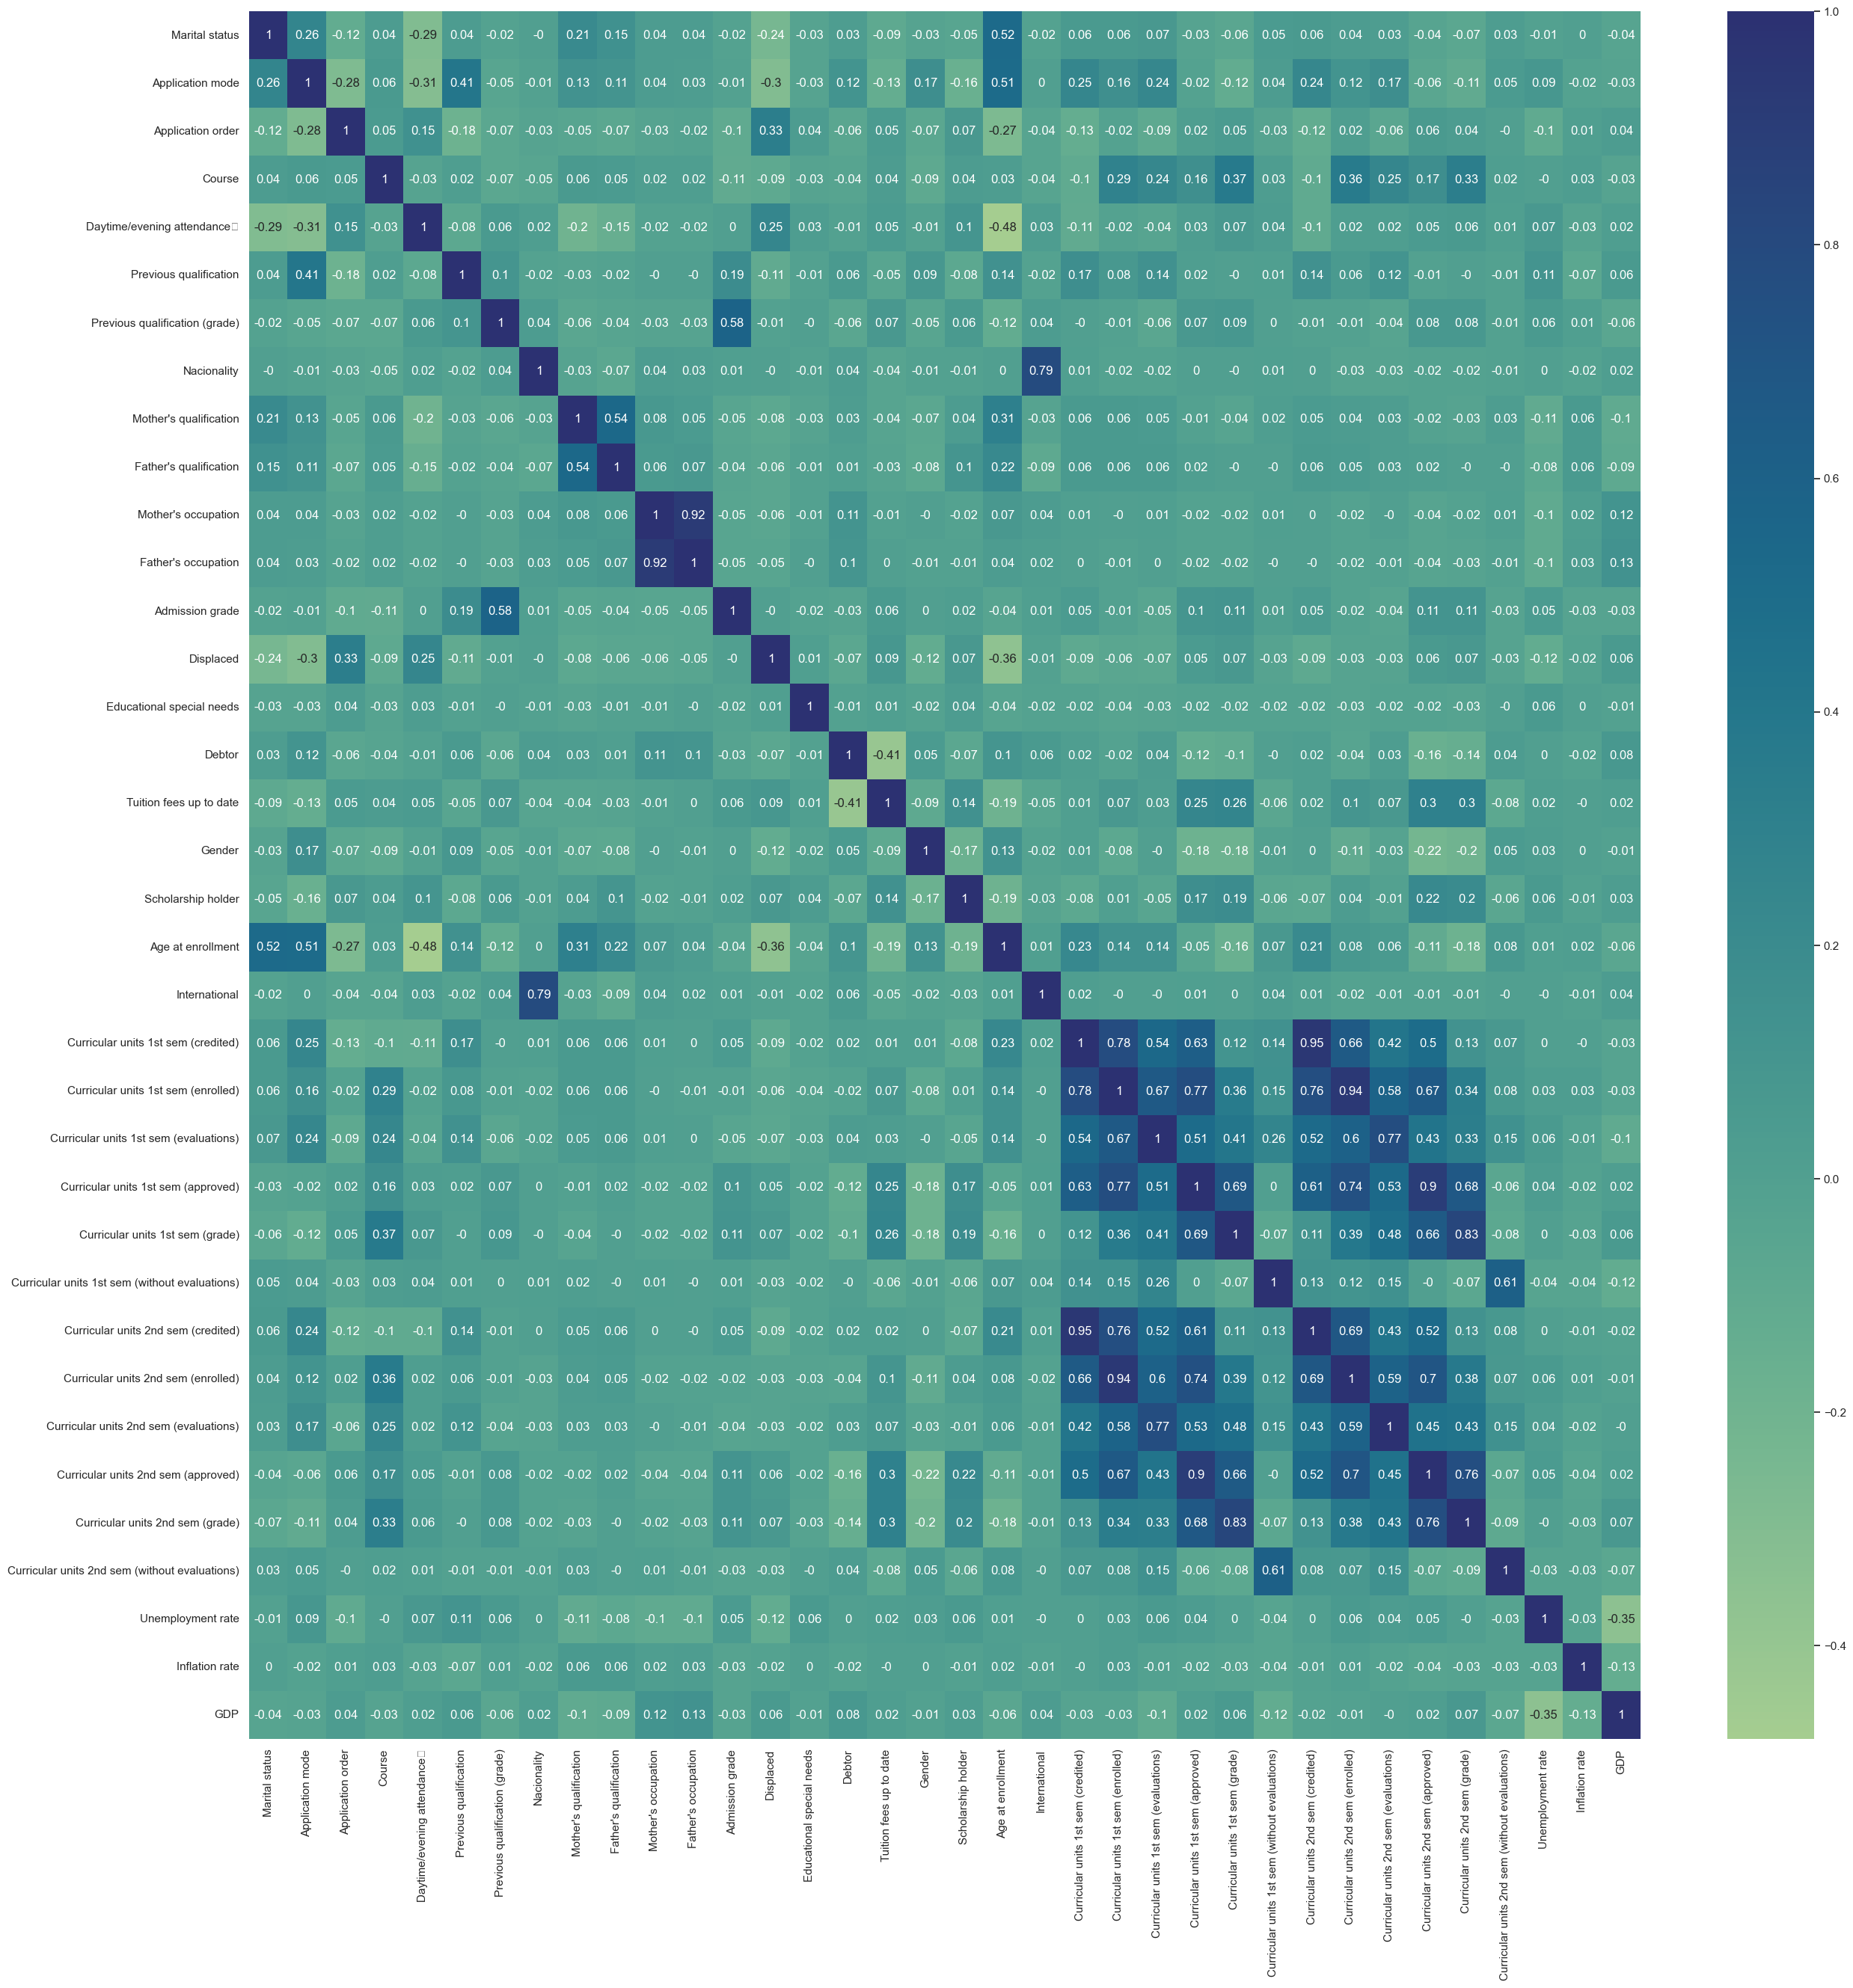

In [11]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(round(df.corr(numeric_only=True),2), annot=True,cmap="crest")
plt.show()

f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
f:\Maestria\MLOps\Proyecto\MLOps_Project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


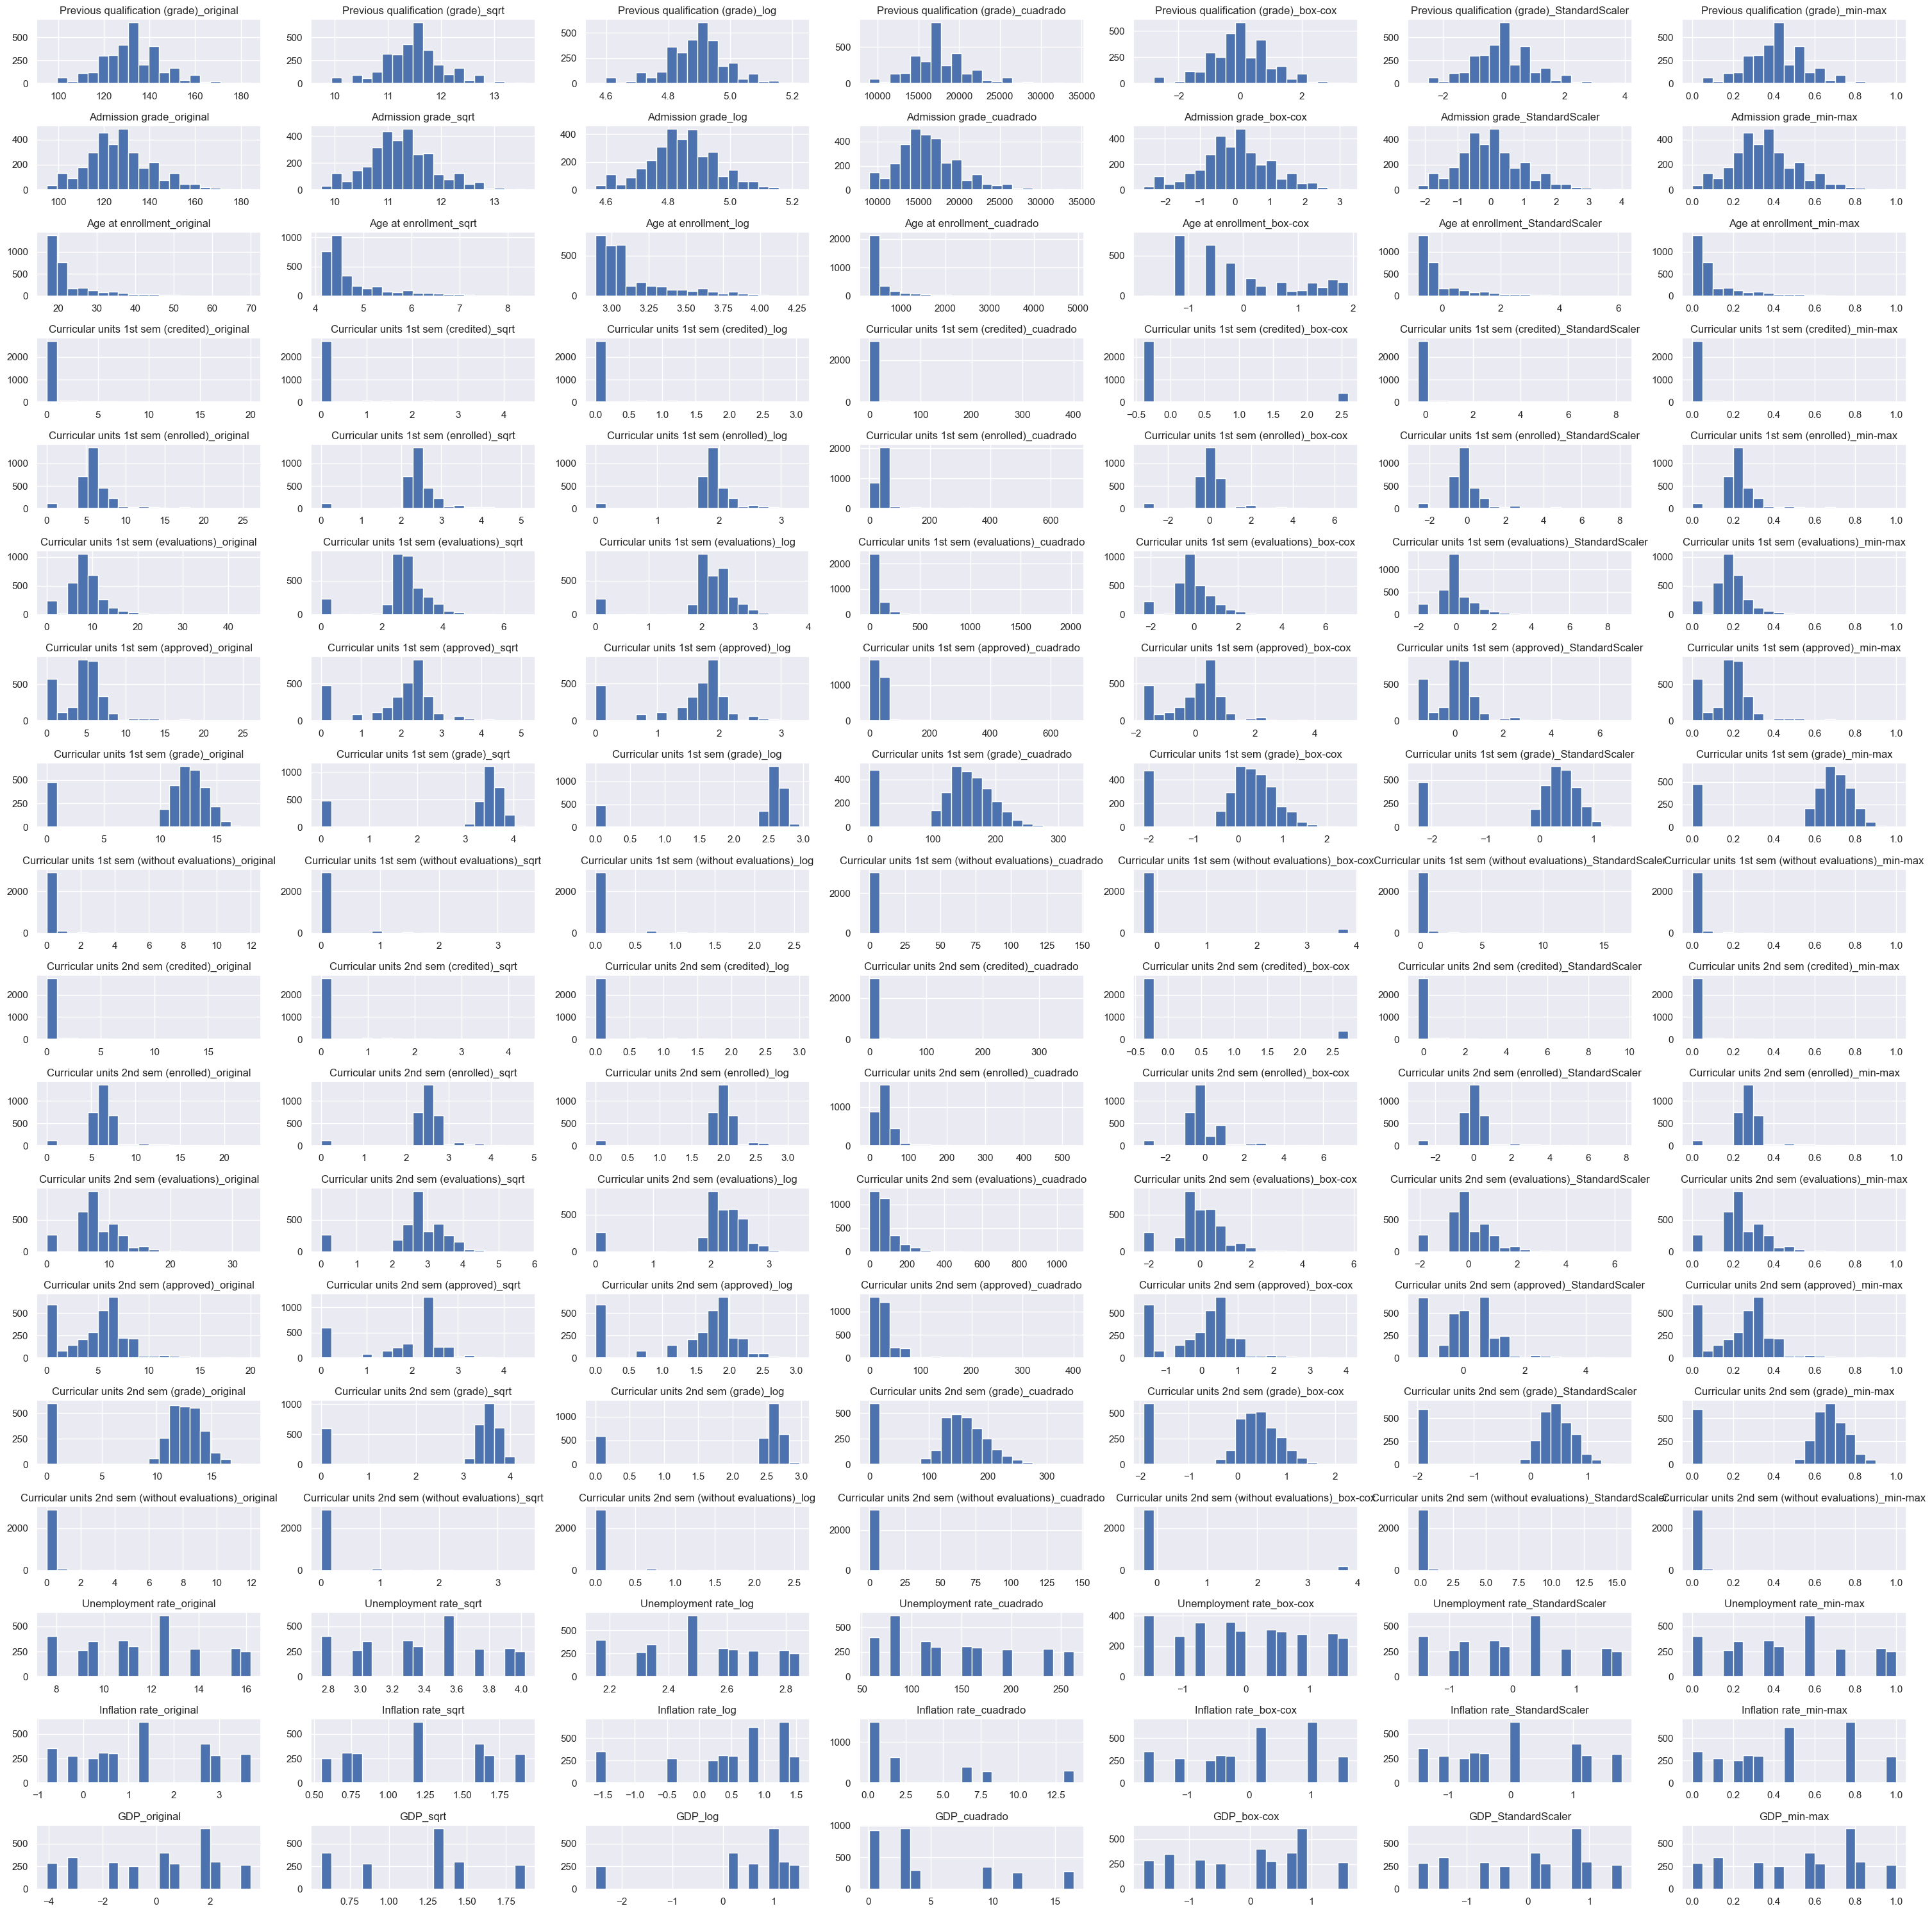

In [12]:
numericos = ['Previous qualification (grade)','Admission grade','Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
fig, axes = plt.subplots(len(numericos), 7, figsize=(30,30))

def histograma(data, bins, ax, variable):
  ax.set_title(variable)
  ax.hist(data, bins=bins)

for i in range(len(numericos)):
  histograma(df[numericos[i]],20,axes[i][0], numericos[i]+'_original')
  histograma(np.sqrt(df[numericos[i]]),20,axes[i][1], numericos[i]+'_sqrt')
  histograma(np.log1p(df[numericos[i]]),20,axes[i][2], numericos[i]+'_log')
  histograma(np.power(df[numericos[i]],2),20,axes[i][3], numericos[i]+'_cuadrado')
  data = df[numericos[i]]
  if min(data) < 1:
    data = df[numericos[i]] + (abs((min(df[numericos[i]]))) + 1)
  box = pd.DataFrame(power_transform(data.to_numpy().reshape(-1, 1),method='box-cox'),columns=[numericos[i]])
  histograma(box,20,axes[i][4], numericos[i]+'_box-cox')
  scaler = StandardScaler()
  standard = pd.DataFrame(scaler.fit_transform(df[numericos[i]].to_numpy().reshape(-1, 1)))
  histograma(standard,20,axes[i][5], numericos[i]+'_StandardScaler')
  scaler = MinMaxScaler()
  minmax = pd.DataFrame(scaler.fit_transform(df[numericos[i]].to_numpy().reshape(-1, 1)))
  histograma(minmax,20,axes[i][6], numericos[i]+'_min-max')

plt.tight_layout()
plt.show()


## Transformaciones a aplicar

Log: 'Previous qualification (grade)','Admission grade', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'

Standard Scaler: 'Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP'

OneHot Encoder: Variables de opción múltiple

# ***Ingeniería de Características***

In [13]:
# Log Transformer:
log_pipe = Pipeline([('Log', FunctionTransformer(np.log1p, feature_names_out='one-to-one'))] )
log_pipe_nombres = ['Previous qualification (grade)','Admission grade', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']

# Standard Scaler
scaler_pipe = Pipeline([('scaler', StandardScaler())] )
scaler_pipe_nombres = ['Age at enrollment', 'Unemployment rate', 'Inflation rate', 'GDP']

# categóricas:
catOHE_pipeline = Pipeline( [('OneHot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))] )
catOHE_pipeline_nombres = list(set(df.columns.values) - set(log_pipe_nombres + scaler_pipe_nombres))

In [14]:
ct_numericas = ColumnTransformer( transformers=[
    ('log_transformer', log_pipe, log_pipe_nombres),
    ('standard_Scaler', scaler_pipe, scaler_pipe_nombres)
] )

ct_categoricas = ColumnTransformer( transformers=[
    ('cat', catOHE_pipeline, catOHE_pipeline_nombres)
] )

### Transformación de datos

In [15]:

data_nums_processed = ct_numericas.fit_transform(df)

In [16]:
# Aplicando PCA al conjunto de entrenamiento
pca = PCA()
x_projected = pca.fit_transform(data_nums_processed)
x_projected = pd.DataFrame(x_projected)
print('Valores propios: ', list(np.round(pca.explained_variance_, decimals = 8)))
print('Porcentaje de Varianza: ', pca.explained_variance_ratio_*100)
print('Varianza Acumulada: ', np.cumsum(pca.explained_variance_ratio_))
print('Valores propios: ')
print(pca.components_)

Valores propios:  [np.float64(3.45815521), np.float64(1.38009885), np.float64(1.14801454), np.float64(1.01953338), np.float64(0.6177589), np.float64(0.52562474), np.float64(0.43417477), np.float64(0.19476671), np.float64(0.16112215), np.float64(0.10572383), np.float64(0.06190704), np.float64(0.05128388), np.float64(0.0371207), np.float64(0.02247485), np.float64(0.01672624), np.float64(0.01469576), np.float64(0.00473429), np.float64(0.00345532)]
Porcentaje de Varianza:  [3.73556938e+01 1.49081075e+01 1.24010859e+01 1.10132062e+01
 6.67315692e+00 5.67790503e+00 4.69004388e+00 2.10390948e+00
 1.74047413e+00 1.14205020e+00 6.68732400e-01 5.53978828e-01
 4.00985338e-01 2.42777840e-01 1.80680220e-01 1.58746543e-01
 5.11407282e-02 3.73250453e-02]
Varianza Acumulada:  [0.37355694 0.52263801 0.64664887 0.75678093 0.8235125  0.88029155
 0.92719199 0.94823109 0.96563583 0.97705633 0.98374365 0.98928344
 0.9932933  0.99572107 0.99752788 0.99911534 0.99962675 1.        ]
Valores propios: 
[[ 1.8893

In [17]:
# Varianza por cada componente
total_components = data_nums_processed.shape[1]
for i in range(0, total_components):
  print("Porcentaje de Varianza por componente principal", i+1, "es", format(pca.explained_variance_ratio_[i]*100,'.0f'),'%')

Porcentaje de Varianza por componente principal 1 es 37 %
Porcentaje de Varianza por componente principal 2 es 15 %
Porcentaje de Varianza por componente principal 3 es 12 %
Porcentaje de Varianza por componente principal 4 es 11 %
Porcentaje de Varianza por componente principal 5 es 7 %
Porcentaje de Varianza por componente principal 6 es 6 %
Porcentaje de Varianza por componente principal 7 es 5 %
Porcentaje de Varianza por componente principal 8 es 2 %
Porcentaje de Varianza por componente principal 9 es 2 %
Porcentaje de Varianza por componente principal 10 es 1 %
Porcentaje de Varianza por componente principal 11 es 1 %
Porcentaje de Varianza por componente principal 12 es 1 %
Porcentaje de Varianza por componente principal 13 es 0 %
Porcentaje de Varianza por componente principal 14 es 0 %
Porcentaje de Varianza por componente principal 15 es 0 %
Porcentaje de Varianza por componente principal 16 es 0 %
Porcentaje de Varianza por componente principal 17 es 0 %
Porcentaje de Varia

In [18]:
# Varianza acumulada
print('Varianza Acumulada: ', np.cumsum(pca.explained_variance_ratio_))

Varianza Acumulada:  [0.37355694 0.52263801 0.64664887 0.75678093 0.8235125  0.88029155
 0.92719199 0.94823109 0.96563583 0.97705633 0.98374365 0.98928344
 0.9932933  0.99572107 0.99752788 0.99911534 0.99962675 1.        ]


In [19]:
va = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(va)):
    if va[i] > 0.9:
        print(f'El número de componentes que explican el 90% de la varianza son: {i+1}')
        break

El número de componentes que explican el 90% de la varianza son: 7


In [20]:
# Influencia de las variables para los 7 componentes a utilizar
num_components = 7
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = log_pipe_nombres + scaler_pipe_nombres , index=['Componente principal {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,Previous qualification (grade),Admission grade,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Age at enrollment,Unemployment rate,Inflation rate,GDP
Componente principal 1,0.001889,0.003798,0.101841,0.145396,0.261680,0.377604,0.470120,0.002950,0.090420,0.139734,0.287584,0.390176,0.515187,0.005668,0.080061,0.002596,0.023102,0.036668
Componente principal 2,0.003434,0.002419,0.076105,0.046223,0.074847,0.017511,0.006845,0.022031,0.065484,0.042471,0.049990,0.003341,0.031032,0.014855,0.214251,0.636832,0.193721,0.697740
Componente principal 3,0.013587,0.007475,0.290914,0.133667,0.163823,0.005451,0.064997,0.035075,0.255428,0.108832,0.131016,0.050022,0.105284,0.038779,0.815422,0.261378,0.064845,0.134755
Componente principal 4,0.001451,0.002678,0.053558,0.004811,0.016500,0.000616,0.027963,0.011433,0.048278,0.006900,0.015282,0.004627,0.038074,0.009661,0.112142,0.314753,0.934830,0.078641
Componente principal 5,0.001679,0.000167,0.023216,0.007888,0.066265,0.025409,0.025025,0.081182,0.020533,0.018074,0.033465,0.025558,0.000104,0.055256,0.077408,0.648211,0.285348,0.688459
Componente principal 6,0.005148,0.006186,0.589932,0.150661,0.045361,0.050890,0.215656,0.047706,0.526032,0.122066,0.000082,0.013178,0.231532,0.027516,0.478593,0.002806,0.022465,0.008596
Componente principal 7,0.014325,0.030497,0.207528,0.194648,0.534773,0.158065,0.046418,0.070193,0.186546,0.199354,0.520656,0.327096,0.307905,0.097174,0.181897,0.049463,0.015555,0.084979


In [21]:
# Transformando las variables categoricas

data_cat_processed= ct_categoricas.fit_transform(df)
onehot_columns = ct_categoricas.named_transformers_['cat'].get_feature_names_out()
data_cat_processed_df = pd.DataFrame(data_cat_processed, columns=onehot_columns)

all_cat = ct_categoricas.fit_transform(original)
total_categories = ct_categoricas.named_transformers_['cat'].get_feature_names_out()

missig_categories = list(set(total_categories)-set(onehot_columns))

for missing in missig_categories:
    data_cat_processed_df[missing]=0

In [22]:
data_cat_processed_df

,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,...,Mother's occupation_171,Nacionality_108,Father's occupation_153,Father's qualification_33,Mother's occupation_125,Father's occupation_174,Father's occupation_124,Father's qualification_41,Application mode_26,Father's occupation_195
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3094,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Conjunto de entrenamiento 

In [23]:
componentes = x_projected.iloc[:,0:7]
componentes.reset_index(drop=True, inplace=True)
data_cat_processed_df.reset_index(drop=True, inplace=True)
Xtrain = pd.concat([componentes,data_cat_processed_df], axis=1)
Xtrain.columns = Xtrain.columns.astype(str)

# **Modelos de aprendizaje automático.**

### ***Seleccion de hiperparámetros***

In [24]:
param_grid = {
        'RF': 
        {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'criterion':['log_loss', 'entropy', 'gini'],
                'max_features':['sqrt', 'log2'],
                'bootstrap':[True,False],
                'class_weight':['balanced', 'balanced_subsample']
        },
        'SVC': {
                'C': [0.1, 1, 3, 5],
                'gamma':[0.005, 0.5, 0.05, 0,.01],
                'kernel': ['linear', 'rbf']
        },        
        'KNN': {
                'n_neighbors': [3, 5, 9, 12, 15, 17, 21],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                'leaf_size': [10, 20, 30, 40, 50]
        },
        'LR':{
            'C':[1,5,10],
            'solver':['lbfgs', 'newton-cg', 'sag', 'saga']
        },
        'DTree': {
            'min_samples_split':[1,3,5,10],
            'max_depth':[5,10,15,20],
            'max_leaf_nodes':[2,3,5,7,10],
            'criterion':['log_loss', 'entropy', 'gini'],
            'splitter':['best', 'random']
        },
        'MLP':{
            'learning_rate_init':[0.005,0.001,0.05,0.01],
            'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05],
            'solver':['lbfgs', 'sgd', 'adam']
        }


}

In [25]:
def model_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, verbose = 2, cv=3)
    grid_search.fit(X_train, y_train.ravel())
    best_mod = grid_search.best_params_
    return  best_mod

In [26]:
from warnings import filterwarnings
filterwarnings('ignore')
def mis_modelos():
  modelos, nombres = list(), list()

  modelos.append(LogisticRegression(max_iter=1000))
  nombres.append('LR')

  modelos.append(KNeighborsClassifier())
  nombres.append('KNN')

  modelos.append(DecisionTreeClassifier())
  nombres.append('DTree')

  modelos.append(RandomForestClassifier(n_jobs=-1))
  nombres.append('RF')

  modelos.append(MLPClassifier( hidden_layer_sizes=(20,20),max_iter=10000))
  nombres.append('MLP')

  modelos.append(SVC())
  nombres.append('SVC')


  return modelos, nombres


modelos, nombres = mis_modelos()

parameters = []
for i in range(len(modelos)):
    result = model_grid_search(modelos[i], param_grid[nombres[i]], Xtrain, ytrain)
    parameters.append(result)
    print(f'Best estimators for {nombres[i]} : {result}')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best estimators for LR : {'C': 1, 'solver': 'newton-cg'}
Fitting 3 folds for each of 210 candidates, totalling 630 fits
Best estimators for KNN : {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 12, 'weights': 'distance'}
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best estimators for DTree : {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_split': 3, 'splitter': 'best'}
Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best estimators for RF : {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best estimators for MLP : {'alpha': 0.01, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best estimators for SVC : {'C': 3, 'gamma': 0.05, '

In [27]:
from warnings import filterwarnings
filterwarnings('ignore')


modelos, nombres = mis_modelos()
for i in range(len(modelos)):
  modelos[i].set_params(**parameters[i])

resultados = list()


for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=20,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = ['accuracy','precision_macro','recall_macro','f1_macro']

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrain,
                          np.ravel(ytrain),
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          error_score = 0,
                          )

  score = []
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))
      score.append([k, np.mean(scores[k])])
    resultados.append(score)

>> LR
	 test_accuracy 0.760 (0.016)
	 train_accuracy 0.798 (0.004)
	 test_precision_macro 0.706 (0.024)
	 train_precision_macro 0.763 (0.006)
	 test_recall_macro 0.672 (0.019)
	 train_recall_macro 0.719 (0.006)
	 test_f1_macro 0.681 (0.021)
	 train_f1_macro 0.732 (0.006)
>> KNN
	 test_accuracy 0.685 (0.013)
	 train_accuracy 1.000 (0.000)
	 test_precision_macro 0.635 (0.033)
	 train_precision_macro 1.000 (0.000)
	 test_recall_macro 0.554 (0.015)
	 train_recall_macro 1.000 (0.000)
	 test_f1_macro 0.552 (0.018)
	 train_f1_macro 1.000 (0.000)
>> DTree
	 test_accuracy 0.729 (0.014)
	 train_accuracy 0.742 (0.005)
	 test_precision_macro 0.657 (0.024)
	 train_precision_macro 0.679 (0.012)
	 test_recall_macro 0.620 (0.019)
	 train_recall_macro 0.636 (0.017)
	 test_f1_macro 0.619 (0.023)
	 train_f1_macro 0.637 (0.023)
>> RF
	 test_accuracy 0.765 (0.014)
	 train_accuracy 0.961 (0.003)
	 test_precision_macro 0.714 (0.021)
	 train_precision_macro 0.962 (0.004)
	 test_recall_macro 0.685 (0.018)
	 tr


>>Reporte varias métricas con Test:
              precision    recall  f1-score   support

     Dropout       0.80      0.71      0.75       427
    Enrolled       0.53      0.34      0.42       238
    Graduate       0.76      0.91      0.83       663

    accuracy                           0.74      1328
   macro avg       0.70      0.65      0.67      1328
weighted avg       0.73      0.74      0.73      1328


>>Reporte varias métricas con Test:
              precision    recall  f1-score   support

     Dropout       0.81      0.57      0.67       427
    Enrolled       0.51      0.11      0.19       238
    Graduate       0.65      0.95      0.77       663

    accuracy                           0.68      1328
   macro avg       0.65      0.54      0.54      1328
weighted avg       0.67      0.68      0.63      1328


>>Reporte varias métricas con Test:
              precision    recall  f1-score   support

     Dropout       0.75      0.69      0.72       427
    Enrolled      

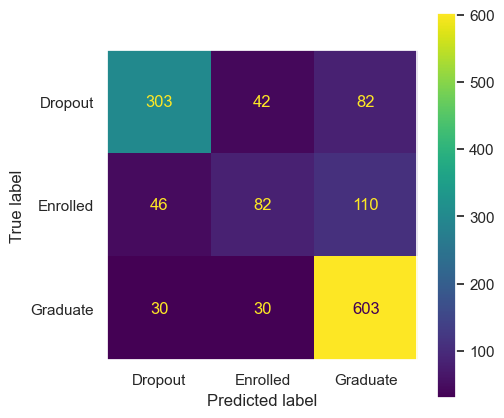

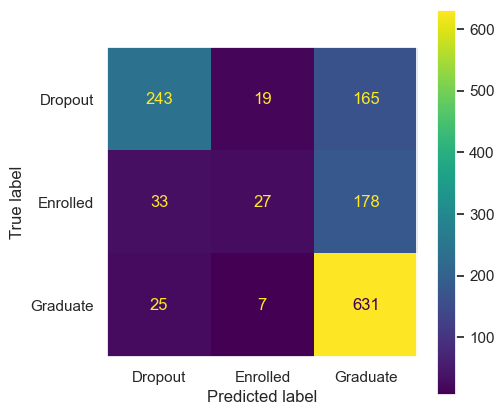

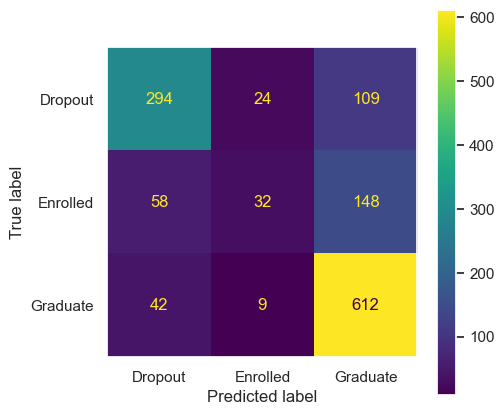

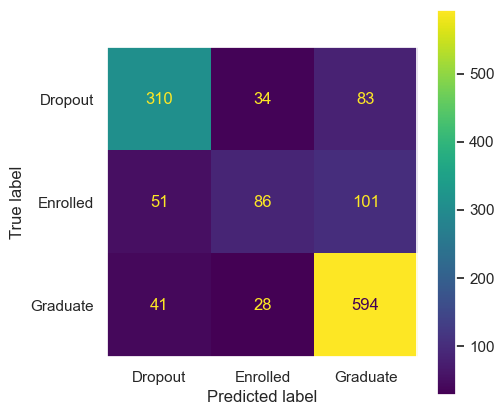

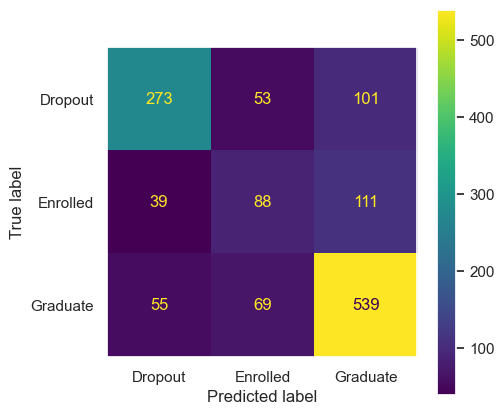

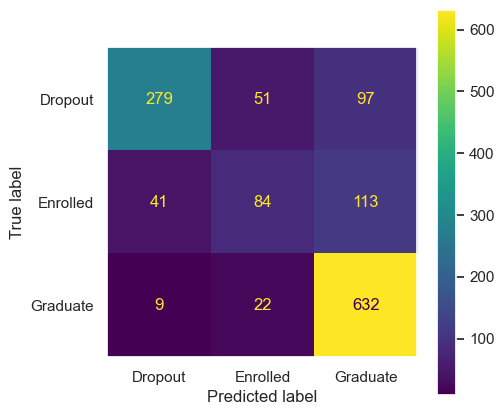

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

for final_model in modelos:

    final_model.fit(Xtrain,ytrain)
    
    data_nums_processed = ct_numericas.fit_transform(Xtesting)
    pca = PCA()
    x_projected = pca.fit_transform(data_nums_processed)
    x_projected = pd.DataFrame(x_projected)
    data_cat_processed= ct_categoricas.fit_transform(Xtesting)
    onehot_columns = ct_categoricas.named_transformers_['cat'].get_feature_names_out()
    data_cat_processed_df = pd.DataFrame(data_cat_processed, columns=onehot_columns)
    componentes = x_projected.iloc[:,0:7]
    componentes.reset_index(drop=True, inplace=True)
    data_cat_processed_df.reset_index(drop=True, inplace=True)

    missig_categories = list(set(total_categories)-set(onehot_columns))

    for missing in missig_categories:
        data_cat_processed_df[missing]=0
    
    Xtest = pd.concat([componentes,data_cat_processed_df], axis=1)
    Xtest.columns = Xtest.columns.astype(str)

    Xtest = Xtest[Xtrain.columns]

    y_pred= final_model.predict(Xtest)
    print("\n>>Reporte varias métricas con Test:")
    print(classification_report(ytest, y_pred))

    cm = confusion_matrix(ytest, y_pred )
    fig, ax = plt.subplots(figsize=(5,5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=final_model.classes_)
    plt.grid(False)
    disp.plot(ax=ax)
